In [1]:
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [2]:
exp_dir = "./predict/0320_Dt_100_fine"
# exp_dir = "./predict/0320_Dt_80_fine"
# exp_dir = "./predict/0320_Dt_50_fine"
# exp_dir = "./predict/0320_Dt_30_fine"
# exp_dir = "./predict/0320_Dt_20_fine"
exp_dir = "./predict/0320_Dt_15_fine"
# exp_dir = "./predict/0320_Dt_10_fine"
# exp_dir = "./predict/0320_Dt_5_fine"
# exp_dir = "./predict/0320_Dt_1_fine"

# exp_dir = "./predict/0319_0"
# exp_dir = "./predict/0319_Dt_100_fine"
# exp_dir = "./predict/0319_Dst_100_fine"
# exp_dir = "./predict/0319_Dt_80_fine"
# exp_dir = "./predict/0319_Dst_80_fine"
# exp_dir = "./predict/0319_Dt_50_fine"
# exp_dir = "./predict/0319_Dst_50_fine"
# exp_dir = "./predict/0319_Dst_30_fine"
# exp_dir = "./predict/0319_Dt_30_fine"
# exp_dir = "./predict/0319_Dt_20_fine"
sX = np.loadtxt(f"{exp_dir}/Ds_train_100/vecs.tsv", dtype=np.float, delimiter='\t')
sY = np.loadtxt(f"{exp_dir}/Ds_train_100/metas.tsv", dtype=int, delimiter='\t')
sX = np.loadtxt(f"{exp_dir}/Ds_train/vecs.tsv", dtype=np.float, delimiter='\t')
sY = np.loadtxt(f"{exp_dir}/Ds_train/metas.tsv", dtype=int, delimiter='\t')

tX = np.loadtxt(f"{exp_dir}/Dt_train_100/vecs.tsv", dtype=np.float, delimiter='\t')
tY = np.loadtxt(f"{exp_dir}/Dt_train_100/metas.tsv", dtype=int, delimiter='\t')
tX = np.loadtxt(f"{exp_dir}/Dt_train/vecs.tsv", dtype=np.float, delimiter='\t')
tY = np.loadtxt(f"{exp_dir}/Dt_train/metas.tsv", dtype=int, delimiter='\t')

x_ =  np.loadtxt(f"{exp_dir}/D_test/vecs.tsv", dtype=np.float, delimiter='\t')
y_ =  np.loadtxt(f"{exp_dir}/D_test/metas.tsv", dtype=int, delimiter='\t')

x =  np.loadtxt(f"{exp_dir}/D_test_new/vecs.tsv", dtype=np.float, delimiter='\t')
y =  np.loadtxt(f"{exp_dir}/D_test_new/metas.tsv", dtype=int, delimiter='\t')

In [3]:
acc = list()

## Ds Domain: Precision, Recall, F1-score

### Test 100

In [4]:
X = sX
Y = sY
xt = x[:1400]
yt = y[:1400]
clf = SVC().fit(X, Y)
y_hat = clf.predict(xt)
result = precision_recall_fscore_support(yt, y_hat, average=None, labels=[i for i in range(14)])
print(accuracy_score(yt, y_hat))
acc.append(accuracy_score(yt, y_hat)) 

0.9342857142857143


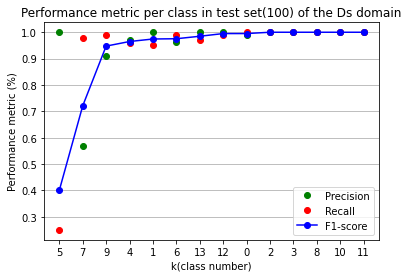

In [5]:
P = result[0]
R = result[1]
F = result[2]
label = [str(i) for i in F.argsort()]
P = P[F.argsort()]
R = R[F.argsort()]
F = F[F.argsort()]

fig, ax = plt.subplots()  # Create a figure containing a single axes.

ax.plot(label, P, 'go', label='Precision')
ax.plot(label, R, 'ro', label='Recall')
ax.plot(label, F, '-bo', label='F1-score')

ax.set_title('Performance metric per class in test set(100) of the Ds domain')
plt.grid(True,axis='y')
# ax.set_ylim([0.5, 1.02])
ax.set_xticks(range(len(label)))
ax.set_xticklabels(label)
plt.xlabel("k(class number)")
plt.ylabel("Performance metric (%)")
ax.legend(loc='lower right')

In [6]:
X = sX
Y = sY
xt = x_[:4201]
yt = y_[:4201]
clf = SVC().fit(X, Y)
y_hat = clf.predict(xt)
result = precision_recall_fscore_support(yt, y_hat, average=None, labels=[i for i in range(14)])
print(accuracy_score(yt, y_hat))
acc.append(accuracy_score(yt, y_hat)) 

0.9992858843132587


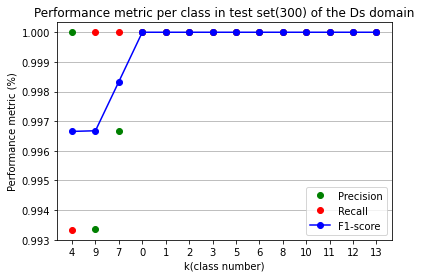

In [7]:
P = result[0]
R = result[1]
F = result[2]
label = [str(i) for i in F.argsort()]
P = P[F.argsort()]
R = R[F.argsort()]
F = F[F.argsort()]

fig, ax = plt.subplots()  # Create a figure containing a single axes.

ax.plot(label, P, 'go', label='Precision')
ax.plot(label, R, 'ro', label='Recall')
ax.plot(label, F, '-bo', label='F1-score')

ax.set_title('Performance metric per class in test set(300) of the Ds domain')
plt.grid(True,axis='y')
# ax.set_ylim([0.5, 1.02])
ax.set_xticks(range(len(label)))
ax.set_xticklabels(label)
plt.xlabel("k(class number)")
plt.ylabel("Performance metric (%)")
ax.legend(loc='lower right')

0.9830387430815926


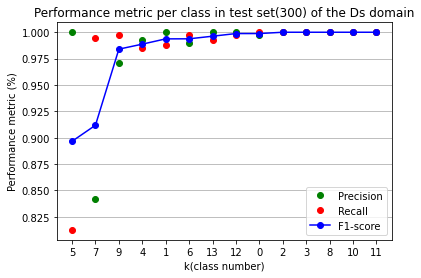

In [8]:
X = sX
Y = sY
xt = np.r_[x[:1400],x_[:4201]]
yt = np.r_[y[:1400],y_[:4201]]
clf = SVC().fit(X, Y)
y_hat = clf.predict(xt)
result = precision_recall_fscore_support(yt, y_hat, average=None, labels=[i for i in range(14)])
print(accuracy_score(yt, y_hat))
acc.append(accuracy_score(yt, y_hat)) 
P = result[0]
R = result[1]
F = result[2]
label = [str(i) for i in F.argsort()]
P = P[F.argsort()]
R = R[F.argsort()]
F = F[F.argsort()]

fig, ax = plt.subplots()  # Create a figure containing a single axes.

ax.plot(label, P, 'go', label='Precision')
ax.plot(label, R, 'ro', label='Recall')
ax.plot(label, F, '-bo', label='F1-score')

ax.set_title('Performance metric per class in test set(300) of the Ds domain')
plt.grid(True,axis='y')
# ax.set_ylim([0.5, 1.02])
ax.set_xticks(range(len(label)))
ax.set_xticklabels(label)
plt.xlabel("k(class number)")
plt.ylabel("Performance metric (%)")
ax.legend(loc='lower right')

## Dt Domain: Precision, Recall, F1-score

In [9]:
X = tX
Y = tY
xt = x[1400:]
yt = y[1400:] - 14
clf = SVC().fit(X, Y)
y_hat = clf.predict(xt)
result = precision_recall_fscore_support(yt, y_hat, average=None, labels=[i for i in range(5)])
print(accuracy_score(yt, y_hat))
acc.append(accuracy_score(yt, y_hat)) 

0.884


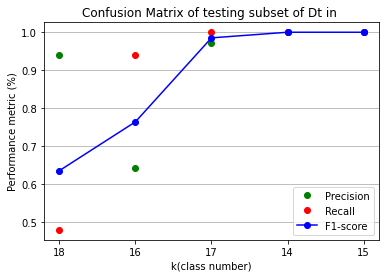

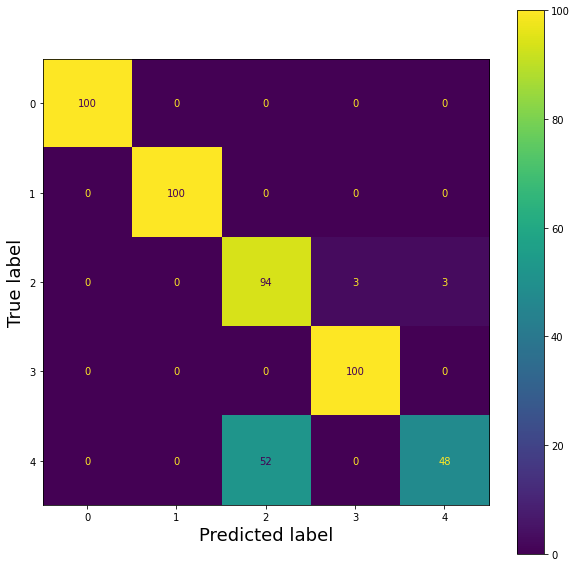

In [10]:
P = result[0]
R = result[1]
F = result[2]
label = [str(i+14) for i in F.argsort()]
P = P[F.argsort()]
R = R[F.argsort()]
F = F[F.argsort()]

fig, ax = plt.subplots()  # Create a figure containing a single axes.

ax.plot(label, P, 'go', label='Precision')
ax.plot(label, R, 'ro', label='Recall')
ax.plot(label, F, '-bo', label='F1-score')

ax.set_title('Performance metric per class in test set(100) of the Dt domain')
plt.grid(True,axis='y')
# ax.set_ylim([0.5, 1.02])
ax.set_xticks(range(len(label)))
ax.set_xticklabels(label)
plt.xlabel("k(class number)")
plt.ylabel("Performance metric (%)")
ax.legend(loc='lower right')

fig_, ax_ = plt.subplots(figsize=(10, 10))
label_font = {'size':'18'}  # Adjust to fit
ax.set_title('Confusion Matrix of testing subset of Dt in ')
ax_.set_xlabel('Predicted labels', fontdict=label_font);
ax_.set_ylabel('Observed labels', fontdict=label_font);
plot_confusion_matrix(clf, xt, yt, values_format = 'd', ax=ax_)

In [11]:
X = tX
Y = tY
xt = x_[4201:]
yt = y_[4201:]-14
clf = SVC().fit(X, Y)
y_hat = clf.predict(xt)
result = precision_recall_fscore_support(yt, y_hat, average=None, labels=[i for i in range(5)])
print(accuracy_score(yt, y_hat))
acc.append(accuracy_score(yt, y_hat)) 

0.9439626417611742


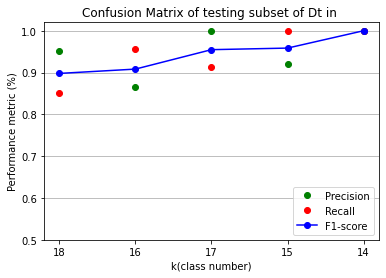

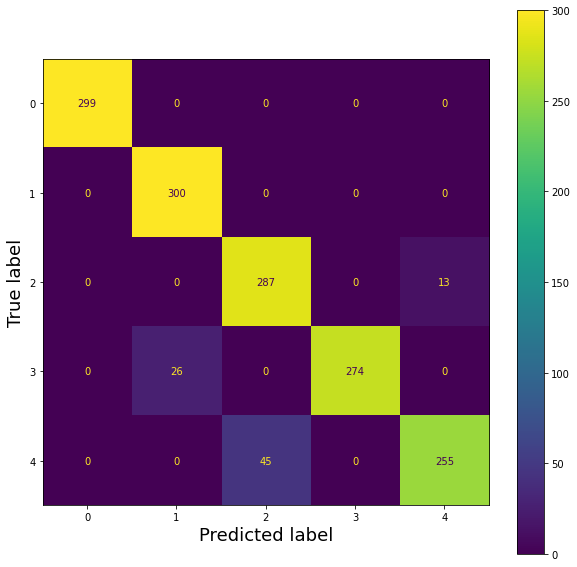

In [12]:
P = result[0]
R = result[1]
F = result[2]
label = [str(i+14) for i in F.argsort()]
P = P[F.argsort()]
R = R[F.argsort()]
F = F[F.argsort()]

fig, ax = plt.subplots()  # Create a figure containing a single axes.

ax.plot(label, P, 'go', label='Precision')
ax.plot(label, R, 'ro', label='Recall')
ax.plot(label, F, '-bo', label='F1-score')

ax.set_title('Performance metric per class in test set(300) of the Dt domain')
plt.grid(True,axis='y')
ax.set_ylim([0.5, 1.02])
ax.set_xticks(range(len(label)))
ax.set_xticklabels(label)
plt.xlabel("k(class number)")
plt.ylabel("Performance metric (%)")
ax.legend(loc='lower right')

fig_, ax_ = plt.subplots(figsize=(10, 10))
label_font = {'size':'18'}  # Adjust to fit
ax.set_title('Confusion Matrix of testing subset of Dt in ')
ax_.set_xlabel('Predicted labels', fontdict=label_font);
ax_.set_ylabel('Observed labels', fontdict=label_font);
plot_confusion_matrix(clf, xt, yt, values_format = 'd', ax=ax_)

0.928928928928929


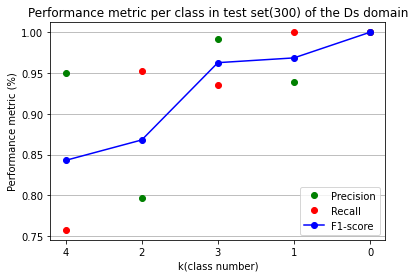

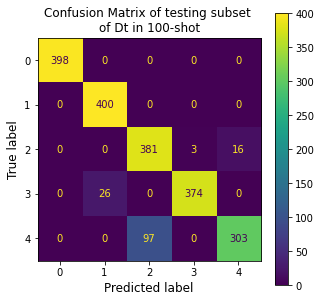

In [13]:
X = tX
Y = tY
xt = np.r_[x[1401:],x_[4201:]]
yt = np.r_[y[1401:],y_[4201:]]-14
clf = SVC().fit(X, Y)
y_hat = clf.predict(xt)
result = precision_recall_fscore_support(yt, y_hat, average=None, labels=[i for i in range(5)])
print(accuracy_score(yt, y_hat))
acc.append(accuracy_score(yt, y_hat)) 
P = result[0]
R = result[1]
F = result[2]
label = [str(i) for i in F.argsort()]
P = P[F.argsort()]
R = R[F.argsort()]
F = F[F.argsort()]

fig, ax = plt.subplots()  # Create a figure containing a single axes.

ax.plot(label, P, 'go', label='Precision')
ax.plot(label, R, 'ro', label='Recall')
ax.plot(label, F, '-bo', label='F1-score')

ax.set_title('Performance metric per class in test set(300) of the Ds domain')
plt.grid(True,axis='y')
# ax.set_ylim([0.5, 1.02])
ax.set_xticks(range(len(label)))
ax.set_xticklabels(label)
plt.xlabel("k(class number)")
plt.ylabel("Performance metric (%)")
ax.legend(loc='lower right')

fig_, ax_ = plt.subplots(figsize=(5, 5))
label_font = {'size':'12'}  # Adjust to fit
ax_.set_title('Confusion Matrix of testing subset \nof Dt in 100-shot')
ax_.set_xlabel('Predicted labels', fontdict=label_font);
ax_.set_ylabel('Observed labels', fontdict=label_font);
plot_confusion_matrix(clf, xt, yt, values_format = 'd', ax=ax_)

## Ds + Dt Domain: Precision, Recall, F1-score

In [14]:
X = np.r_[sX,tX]
Y = np.r_[sY,tY+14]
xt = x
yt = y
clf = SVC().fit(X, Y)
y_hat = clf.predict(xt)
result = precision_recall_fscore_support(yt, y_hat, average=None, labels=[i for i in range(19)])
print(accuracy_score(yt, y_hat))
acc.append(accuracy_score(yt, y_hat)) 

0.8984210526315789


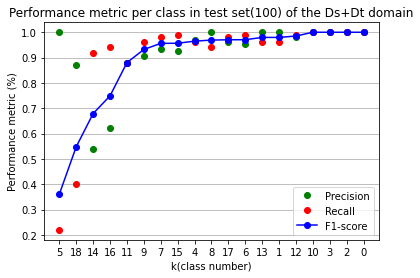

In [15]:
P = result[0]
R = result[1]
F = result[2]
label = [str(i) for i in F.argsort()]
P = P[F.argsort()]
R = R[F.argsort()]
F = F[F.argsort()]

fig, ax = plt.subplots()  # Create a figure containing a single axes.

ax.plot(label, P, 'go', label='Precision')
ax.plot(label, R, 'ro', label='Recall')
ax.plot(label, F, '-bo', label='F1-score')

ax.set_title('Performance metric per class in test set(100) of the Ds+Dt domain')
plt.grid(True,axis='y')
# ax.set_ylim([0.5, 1.02])
ax.set_xticks(range(len(label)))
ax.set_xticklabels(label)
plt.xlabel("k(class number)")
plt.ylabel("Performance metric (%)")
ax.legend(loc='lower right')

In [16]:
X = np.r_[sX,tX]
Y = np.r_[sY,tY+14]
xt = x_
yt = y_
clf = SVC().fit(X, Y)
y_hat = clf.predict(xt)
result = precision_recall_fscore_support(yt, y_hat, average=None, labels=[i for i in range(19)])
print(accuracy_score(yt, y_hat))
acc.append(accuracy_score(yt, y_hat)) 

0.9643859649122807


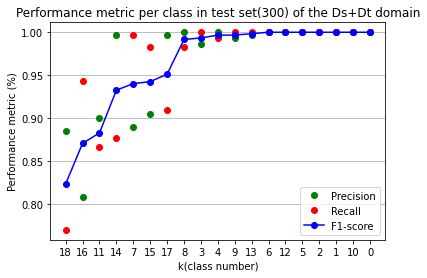

In [17]:
P = result[0]
R = result[1]
F = result[2]
label = [str(i) for i in F.argsort()]
P = P[F.argsort()]
R = R[F.argsort()]
F = F[F.argsort()]

fig, ax = plt.subplots()  # Create a figure containing a single axes.

ax.plot(label, P, 'go', label='Precision')
ax.plot(label, R, 'ro', label='Recall')
ax.plot(label, F, '-bo', label='F1-score')

ax.set_title('Performance metric per class in test set(300) of the Ds+Dt domain')
plt.grid(True,axis='y')
# ax.set_ylim([0.5, 1.02])
ax.set_xticks(range(len(label)))
ax.set_xticklabels(label)
plt.xlabel("k(class number)")
plt.ylabel("Performance metric (%)")
ax.legend(loc='lower right')

0.9478947368421052


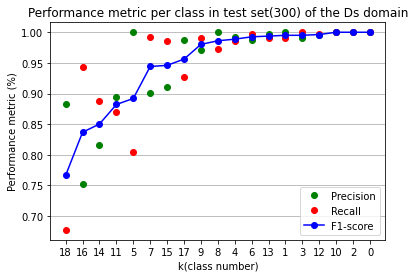

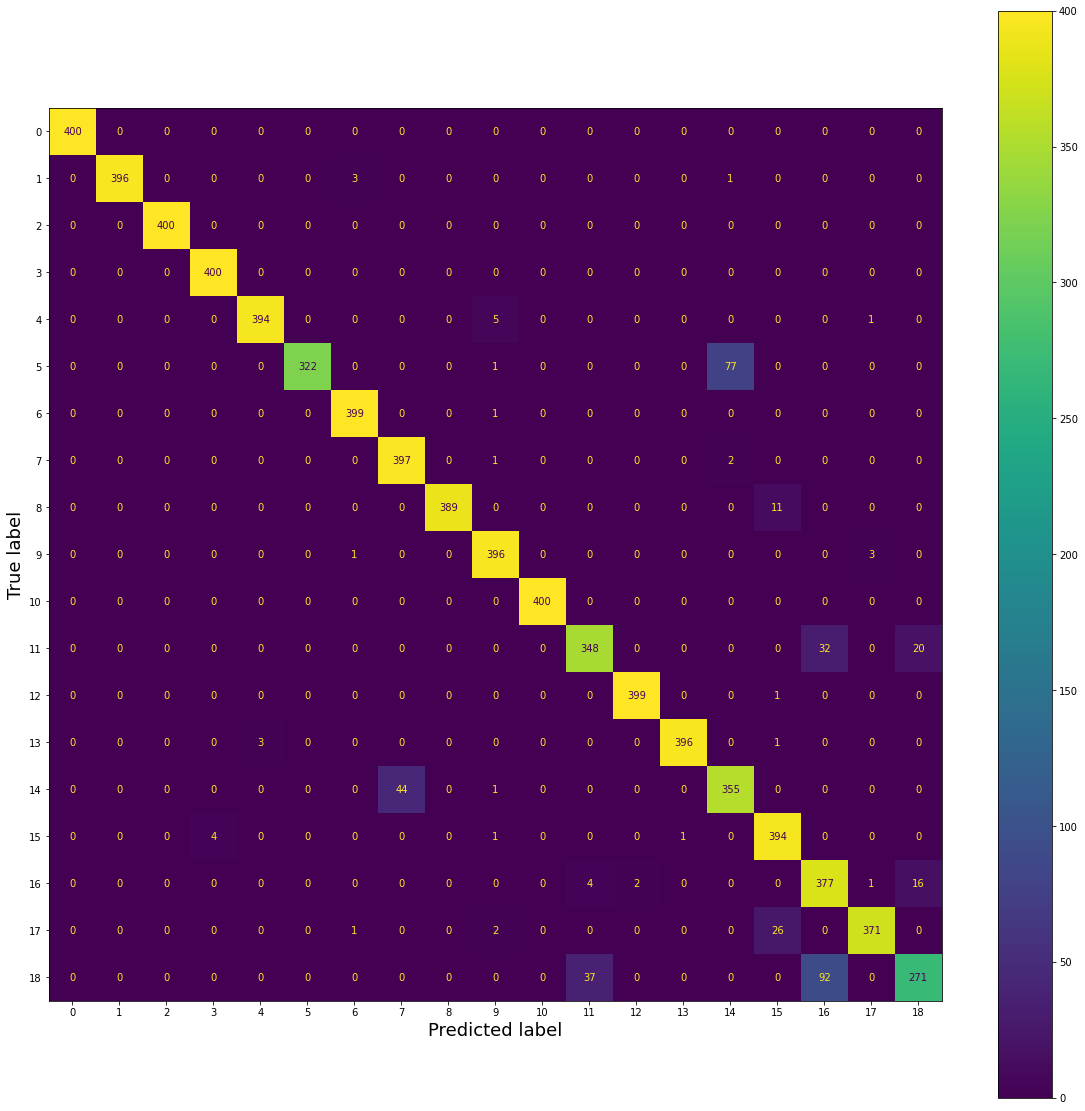

In [18]:

X = np.r_[sX,tX]
Y = np.r_[sY,tY+14]
xt = np.r_[x,x_]
yt = np.r_[y,y_]
clf = SVC().fit(X, Y)
y_hat = clf.predict(xt)
result = precision_recall_fscore_support(yt, y_hat, average=None, labels=[i for i in range(19)])
print(accuracy_score(yt, y_hat))
acc.append(accuracy_score(yt, y_hat)) 
P = result[0]
R = result[1]
F = result[2]
label = [str(i) for i in F.argsort()]
P = P[F.argsort()]
R = R[F.argsort()]
F = F[F.argsort()]

fig, ax = plt.subplots()  # Create a figure containing a single axes.

ax.plot(label, P, 'go', label='Precision')
ax.plot(label, R, 'ro', label='Recall')
ax.plot(label, F, '-bo', label='F1-score')

ax.set_title('Performance metric per class in test set(300) of the Ds domain')
plt.grid(True,axis='y')
# ax.set_ylim([0.5, 1.02])
ax.set_xticks(range(len(label)))
ax.set_xticklabels(label)
plt.xlabel("k(class number)")
plt.ylabel("Performance metric (%)")
ax.legend(loc='lower right')

fig_, ax_ = plt.subplots(figsize=(20, 20))
label_font = {'size':'18'}  # Adjust to fit
ax_.set_xlabel('Predicted labels', fontdict=label_font);
ax_.set_ylabel('Observed labels', fontdict=label_font);
plot_confusion_matrix(clf, xt, yt, values_format = 'd', ax=ax_)

In [19]:
print(acc)

[0.9342857142857143, 0.9992858843132587, 0.9830387430815926, 0.884, 0.9439626417611742, 0.928928928928929, 0.8984210526315789, 0.9643859649122807, 0.9478947368421052]


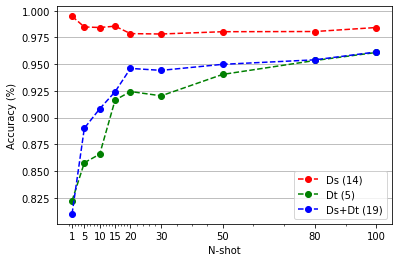

In [20]:
from matplotlib.ticker import FixedFormatter,FixedLocator
shot = [1,5,10,15,20,30,50,80,100]
ds_acc = [0.994822353,
0.984824139,
0.98428852,
0.985538297,
0.978575254,
0.978218175,
0.98036065,
0.980539189,
0.98428852]
dt_acc = [0.822322322,
0.857857858,
0.865865866,
0.916416416,
0.924424424,
0.92042042,
0.94044044,
0.953453453,
0.960960961]
dst_acc = [0.81,
0.890131579,
0.908289474,
0.924210526,
0.946052632,
0.944210526,
0.949868421,
0.954078947,
0.961447368]
fig, ax = plt.subplots()
ax.plot(shot, ds_acc, '--ro', label='Ds (14)')
ax.plot(shot, dt_acc, '--go', label='Dt (5)')
ax.plot(shot, dst_acc, '--bo', label='Ds+Dt (19)')
plt.grid(True,axis='y')
plt.xlabel("N-shot")
plt.ylabel("Accuracy (%)")
ax.xaxis.set_major_locator(FixedLocator(shot))
ax.xaxis.set_minor_locator(FixedLocator([i for i in range(20)]+[22,24,26,28,35,40,45,60,70,90])) 
ax.legend(loc='lower right')

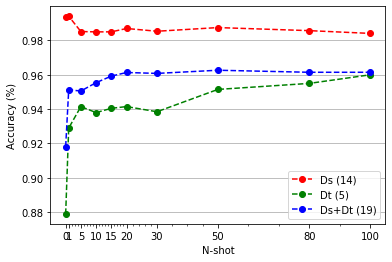

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedFormatter,FixedLocator
shot = [0,1,5,10,15,20,30,50,80,100]
ds_acc = [0.993929655,
0.994108195,
0.985181218,
0.985002678,
0.985002678,
0.986966613,
0.985359757,
0.987502232,
0.985716836,
0.98410998]
dt_acc = [0.878878879,
0.928928929,
0.941441441,
0.937937938,
0.94044044,
0.941441441,
0.938438438,
0.951451451,
0.954954955,
0.95995996]
dst_acc = [0.918157895,
0.951184211,
0.950526316,
0.955394737,
0.959210526,
0.961315789,
0.960789474,
0.962631579,
0.961447368,
0.961447368,]
fig, ax = plt.subplots()
ax.plot(shot, ds_acc, '--ro', label='Ds (14)')
ax.plot(shot, dt_acc, '--go', label='Dt (5)')
ax.plot(shot, dst_acc, '--bo', label='Ds+Dt (19)')
plt.grid(True,axis='y')
plt.xlabel("N-shot")
plt.ylabel("Accuracy (%)")
ax.xaxis.set_major_locator(FixedLocator(shot))
ax.xaxis.set_minor_locator(FixedLocator([i for i in range(20)]+[22,24,26,28,35,40,45,60,70,90])) 
ax.legend(loc='lower right')

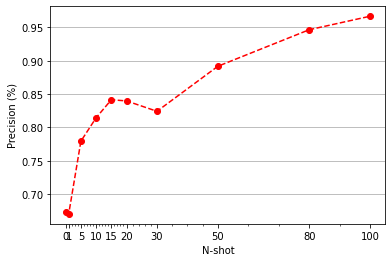

In [4]:
from matplotlib.ticker import FixedFormatter,FixedLocator
shot = [0,1,5,10,15,20,30,50,80,100]
dt_acc = [0.672793097397778,
0.6702131023203266,
0.7792645449168972,
0.8143934247458903,
0.8414250676946725,
0.8396997203260183,
0.824126315101673,
0.8916387344189104,
0.9464370723172983,
0.9666899773945623]

fig, ax = plt.subplots()
ax.plot(shot, dt_acc, '--ro', label='Dt (14)')

plt.grid(True,axis='y')
plt.xlabel("N-shot")
plt.ylabel("Precision (%)")
ax.xaxis.set_major_locator(FixedLocator(shot))
ax.xaxis.set_minor_locator(FixedLocator([i for i in range(20)]+[22,24,26,28,35,40,45,60,70,90])) 
# ax.legend(loc='lower right')